<a href="https://colab.research.google.com/github/venkatanadikatla/pytorch/blob/main/Statistical_Summative_Course_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mention something about you found two differen datsets but distributions are vast different so hence using just the white wine dataset.

In [1]:
!pip install imbalanced-learn
!pip install smogn

In [2]:
!pip install -U imbalanced-learn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import smogn
from sklearn.metrics import r2_score
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis



# Set the display options to show all columns
pd.set_option('display.max_columns', None)

In [3]:
# Load the red wine dataset
red_wine_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df_red = pd.read_csv(red_wine_url, sep=';')

df_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
# Check for missing values
print("\nMissing values:")
print(df_red.isnull().sum())


Missing values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [5]:
# Multi-class - > 0, 1, 2, 3, and 4
# Note: The target variable already has multiple classes (0 = no disease, 1-4 = different levels of disease)
print("\nTarget variable distribution:")
print(df_red["quality"].value_counts())




Target variable distribution:
quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


In [6]:
df_red.nunique().sort_values()

,0
quality,6
free sulfur dioxide,60
alcohol,65
citric acid,80
pH,89
residual sugar,91
fixed acidity,96
sulphates,96
volatile acidity,143
total sulfur dioxide,144


In [7]:
display(df_red.describe())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


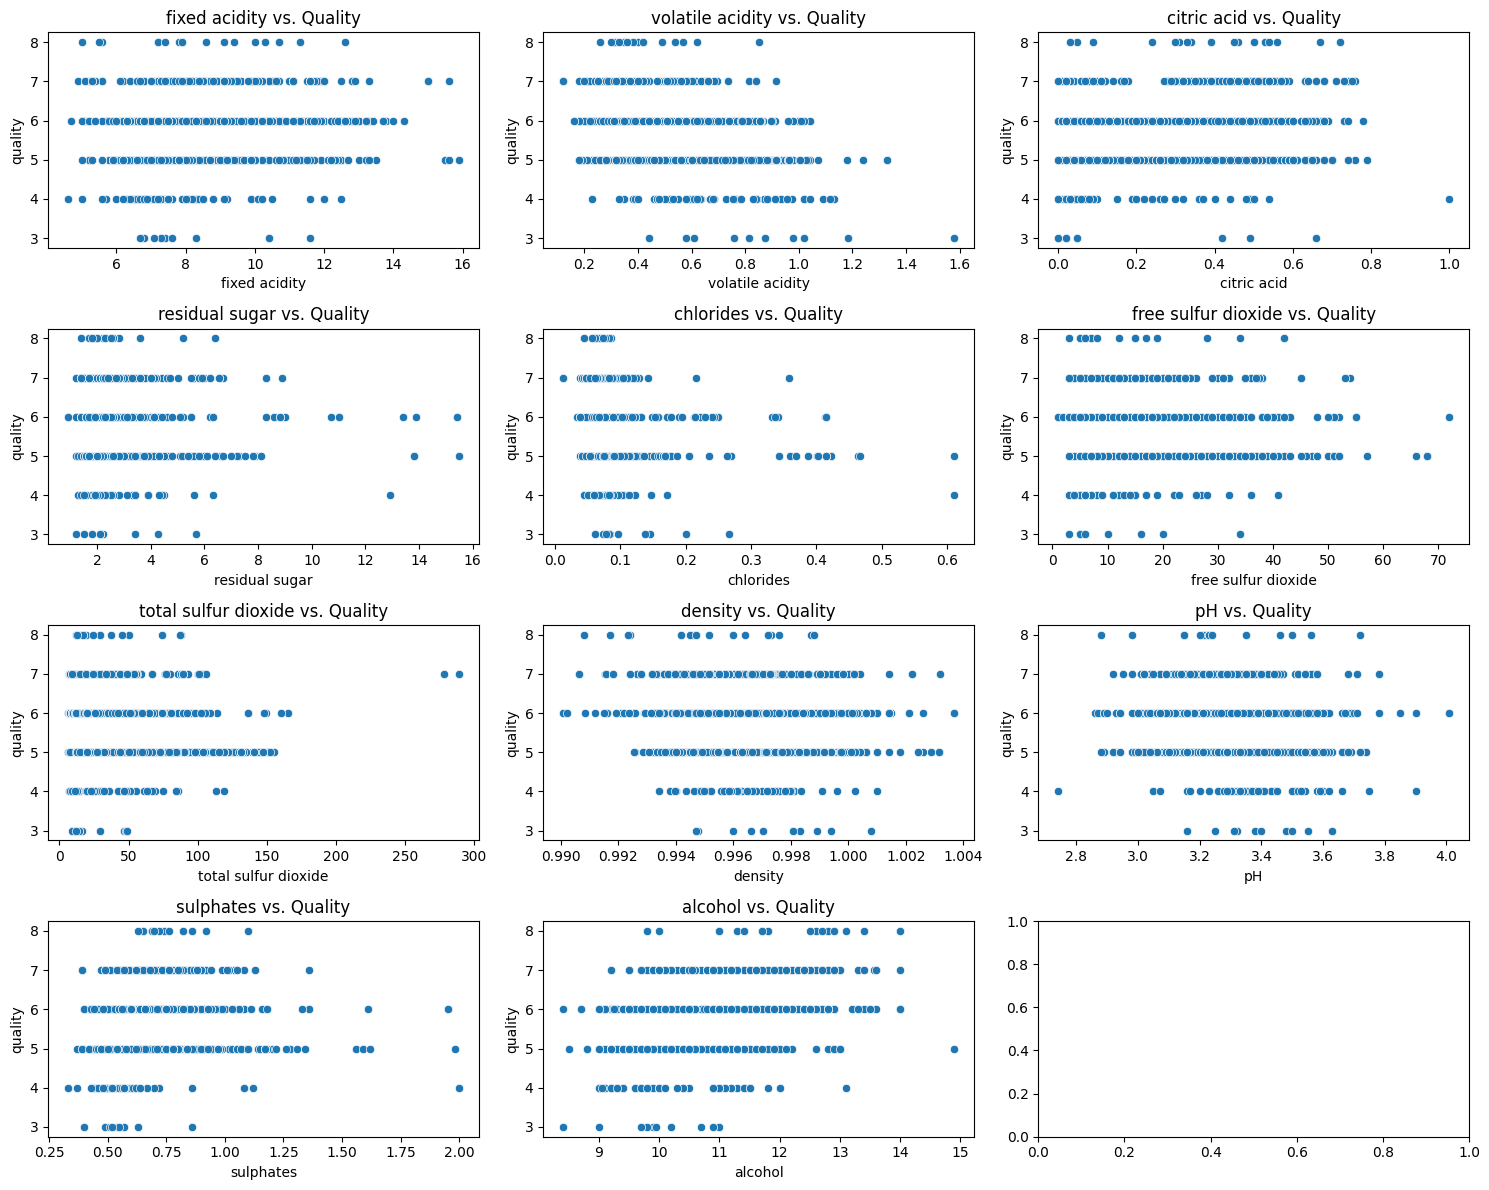

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot scatter plots for each feature against quality
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(df_red.columns[:-1]):  # Exclude 'quality' (target)
    sns.scatterplot(x=df_red[col], y=df_red["quality"], ax=axes[i])
    axes[i].set_title(f"{col} vs. Quality")

plt.tight_layout()
plt.show()


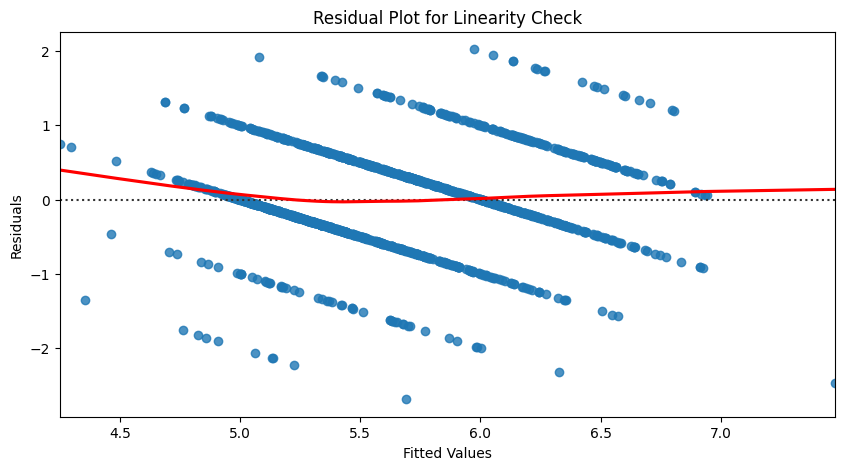

In [9]:
import statsmodels.api as sm

# Fit Linear Regression Model
X = df_red.drop(columns=["quality"])
y = df_red["quality"]
X = sm.add_constant(X)  # Add intercept

model = sm.OLS(y, X).fit()
residuals = model.resid

# Plot residuals
plt.figure(figsize=(10, 5))
sns.residplot(x=model.fittedvalues, y=residuals, lowess=True, line_kws={"color": "red"})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Linearity Check")
plt.show()


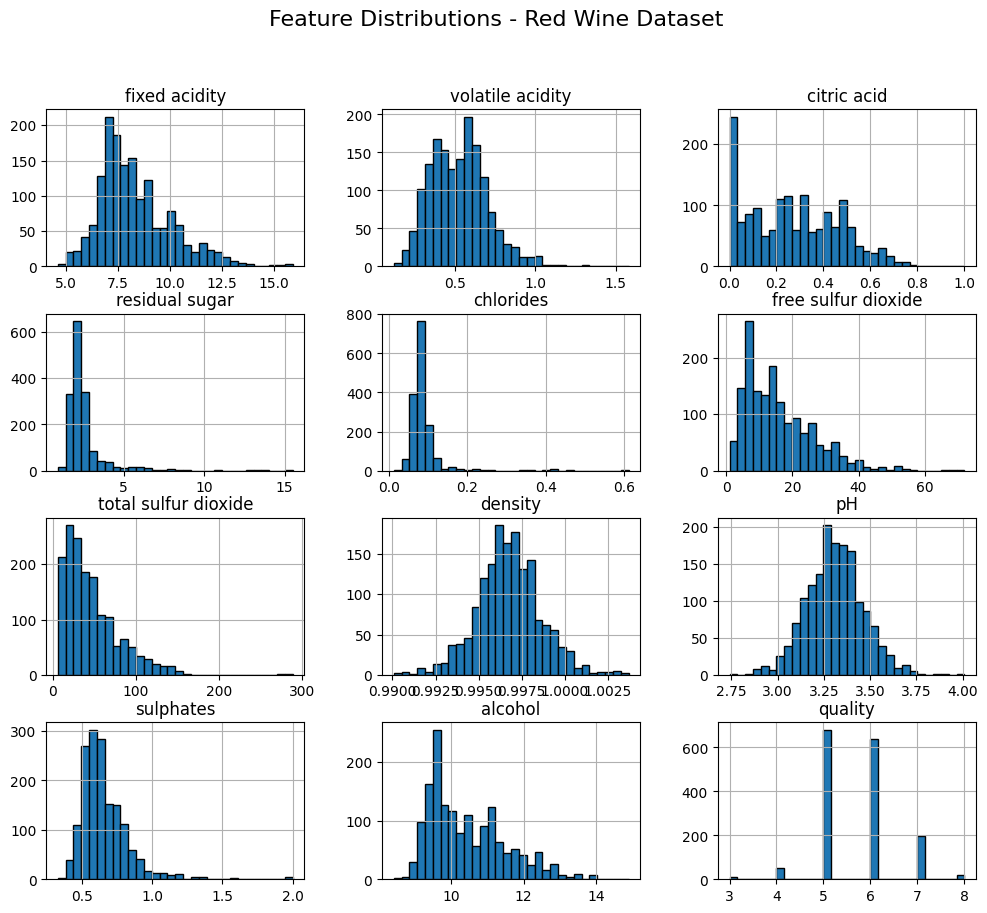

In [11]:

# Plot histogram for each feature
df_red.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions - Red Wine Dataset", fontsize=16)
plt.show()


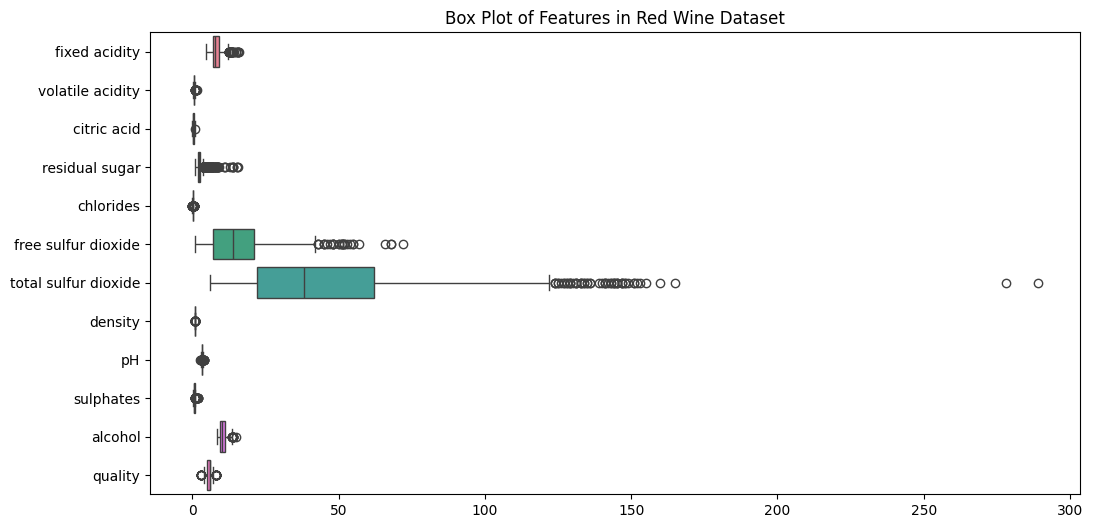

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(data=df_red, orient="h")
plt.title("Box Plot of Features in Red Wine Dataset")
plt.show()


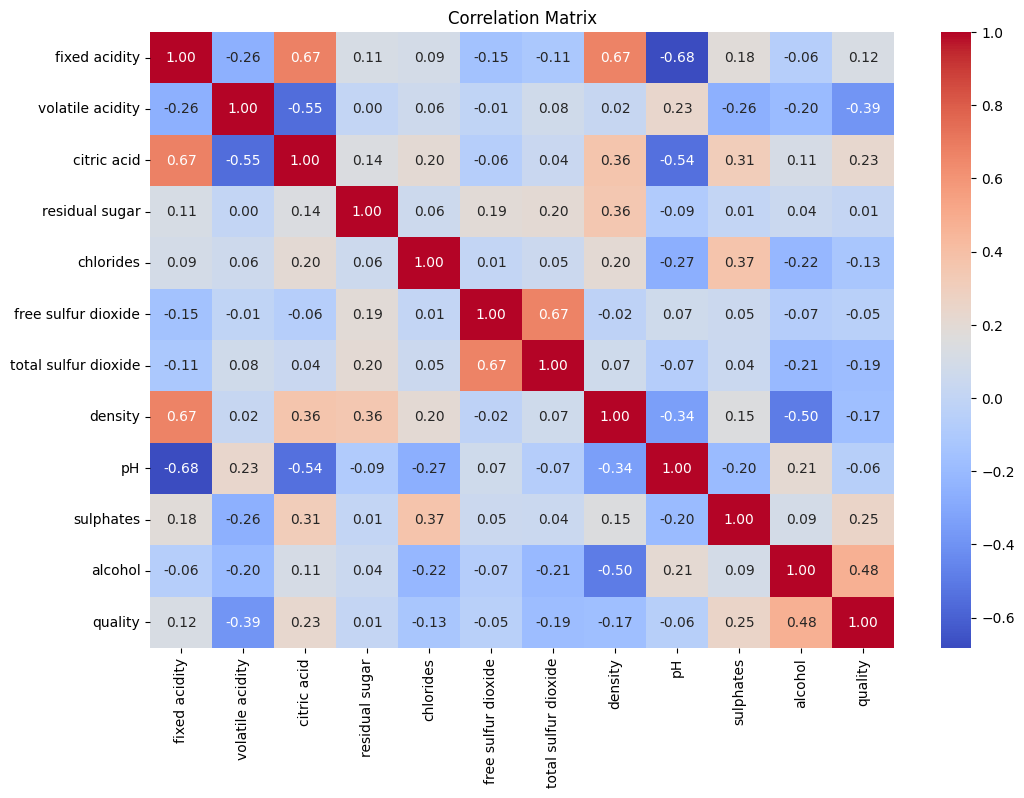

In [11]:
# Compute the correlation matrix for the original dataset
corr_matrix = df_red.corr()
# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()



In [13]:
# # Define function to remove outliers
# def remove_outliers(df, column):
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# # Apply outlier removal to selected features
# outlier_columns = ["citric acid", "density", "residual sugar", "sulphates"]
# for col in outlier_columns:
#     df_red = remove_outliers(df_red, col)
# print(df_red)

# Count original dataset size
original_size = df_red.shape[0]

# Create a copy of the dataset for comparison
df_red_filtered = df_red.copy()

# Apply outlier removal and check how many rows remain
for col in outlier_columns:
    df_red_filtered = remove_outliers(df_red_filtered, col)

# Count remaining rows after outlier removal
filtered_size = df_red_filtered.shape[0]
data_loss = 100 * (original_size - filtered_size) / original_size

# Create a DataFrame to display the data loss information
data_loss_summary = pd.DataFrame({
    "Original Size": [original_size],
    "Filtered Size": [filtered_size],
    "Data Lost (%)": [data_loss]
})

print(data_loss_summary)


NameError: name 'outlier_columns' is not defined

In [74]:
# Split features (X) and target (y)
X = df_red.drop("quality", axis=1)

y = df_red["quality"]

# X_updated = X.drop(columns=["citric acid","volatile acidity","fixed acidity"])


In [75]:
# Split the dataset into training (70%), validation (15%), and test (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42)

# Step 3: Apply **Random Oversampling ONLY on the training set** (targeting low-frequency classes)
oversample_strategy = {3: 20, 4: 50, 8: 40}  # Increasing minority class samples to 50 each
ros = RandomOverSampler(sampling_strategy=oversample_strategy, random_state=42)

X_train_bal, y_train_bal = ros.fit_resample(X_train, y_train)

data_splits = {
    "Train Set Size": len(X_train),
    "Validation Set Size": len(X_val),
    "Test Set Size": len(X_test)
}

print(data_splits)

y_train_bal.value_counts()

{'Train Set Size': 1119, 'Validation Set Size': 240, 'Test Set Size': 240}


,count
quality,
5,477
6,446
7,139
4,50
8,40
3,20


In [76]:
#Step 4: Apply Log Transformation (After Oversampling)
skewed_features = ["free sulfur dioxide", "total sulfur dioxide", "residual sugar", "chlorides"]
for feature in skewed_features:
    X_train_bal[feature] = np.log1p(X_train_bal[feature])
    X_val[feature] = np.log1p(X_val[feature])
    X_test[feature] = np.log1p(X_test[feature])

# #Step 5: Standardize Features
# scaler = StandardScaler()
# X_train_bal_scaled = scaler.fit_transform(X_train_bal)
# X_val_scaled = scaler.transform(X_val)
# X_test_scaled = scaler.transform(X_test)

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_bal_scaled = scaler.fit_transform(X_train_bal)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

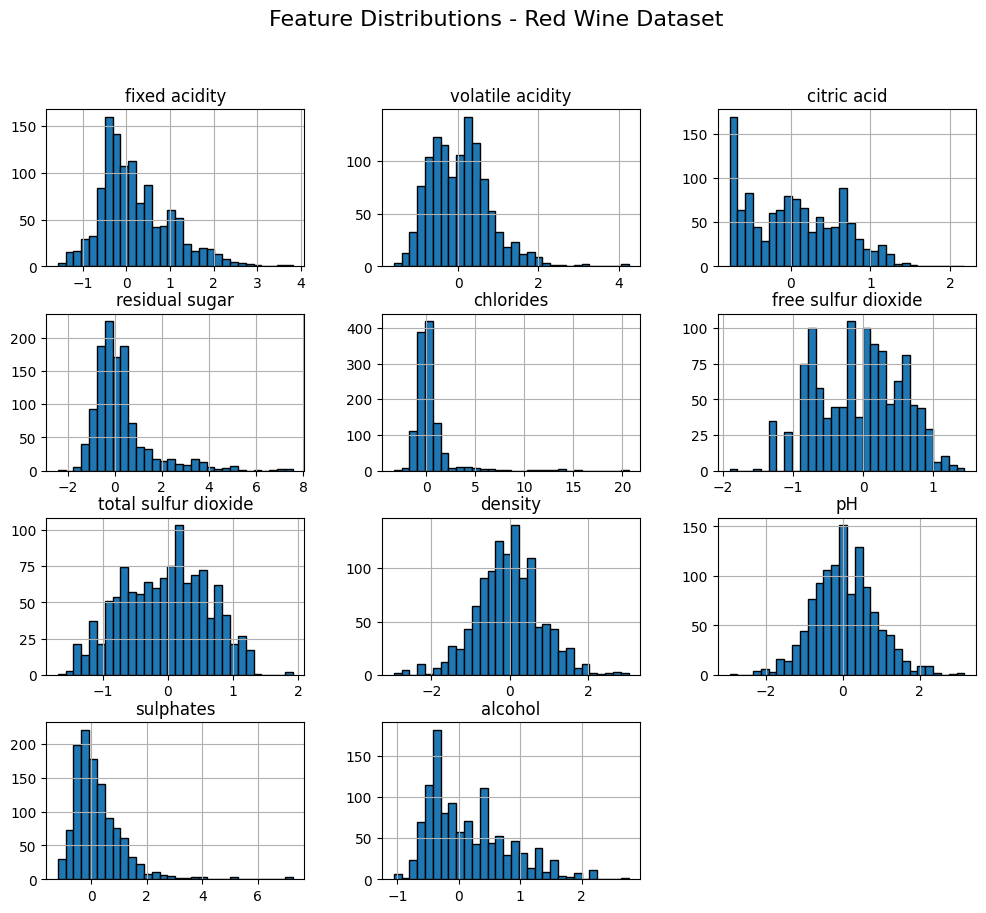

In [77]:

# Plot histogram for each feature
# Convert scaled training data back to DataFrame for visualization
X_train_bal_scaled_df = pd.DataFrame(X_train_bal_scaled, columns=X_train_bal.columns)

X_train_bal_scaled_df.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions - Red Wine Dataset", fontsize=16)
plt.show()


In [78]:
# Step-04(a) Train Linear Regression on the training set all features with StandardScaler()
model = LinearRegression()
model.fit(X_train_bal_scaled, y_train_bal)

# Predict on training data
y_pred_train = model.predict(X_train_bal_scaled)
y_pred_eval = model.predict(X_val_scaled)



# Evaluate on training set

from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train_bal, y_pred_train)
mse_val = mean_squared_error(y_val, y_pred_eval)

print("Mean Squared Error (MSE) - Linear Regression:")
print("MSE (Training Set):", mse_train)
print("MSE (val Set):", mse_val)


r2_linear_val = r2_score(y_val, y_pred_eval)
# Evaluate the model
r2_lr = model.score(X_val_scaled, y_val)
print("R² Score (val Set) - Linear Regression:", r2_linear_val)
print("R² Score (val Set) - Linear Regression:", r2_lr)

Mean Squared Error (MSE) - Linear Regression:
MSE (Training Set): 0.508152155555461
MSE (val Set): 0.42717185591342827
R² Score (val Set) - Linear Regression: 0.33812780361497063
R² Score (val Set) - Linear Regression: 0.33812780361497063


In [79]:
y_pred_test = model.predict(X_test_scaled)
mse_test = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error (MSE) - Linear Regression:")
print("MSE (Test Set):", mse_test)

r2_linear_test = r2_score(y_test, y_pred_test)
r2_lr_test = model.score(X_test_scaled, y_test)

print("R² Score (val Set) - Linear Regression:", r2_linear_test)
print("R² Score (val Set) - Linear Regression:", r2_lr_test)

Mean Squared Error (MSE) - Linear Regression:
MSE (Test Set): 0.4168587727047638
R² Score (val Set) - Linear Regression: 0.3597049251254828
R² Score (val Set) - Linear Regression: 0.3597049251254828


In [80]:
from sklearn.svm import SVR

# Initialize and train the model
svr_model = SVR(kernel='rbf', C=1.0)
svr_model.fit(X_train_bal_scaled, y_train_bal)

# Evaluate the model
r2_svr = svr_model.score(X_val_scaled, y_val)
print(f"R² Score - Support Vector Regression: {r2_svr:.4f}")






R² Score - Support Vector Regression: 0.3921


In [81]:
r2_svr = svr_model.score(X_test_scaled, y_test)
print(f"R² Score - Support Vector Regression: {r2_svr:.4f}")

R² Score - Support Vector Regression: 0.4061


In [83]:
from sklearn.ensemble import AdaBoostRegressor

# Initialize and train the model
abr_model = AdaBoostRegressor(n_estimators=200, random_state=42)
abr_model.fit(X_train_bal_scaled, y_train_bal)

# Evaluate the model
r2_abr = abr_model.score(X_val_scaled, y_val)
print(f"R² Score - AdaBoost Regressor: {r2_abr:.4f}")
r2_abr = abr_model.score(X_test_scaled, y_test)
print(f"R² Score - AdaBoost Regressor: {r2_abr:.4f}")


R² Score - AdaBoost Regressor: 0.4051
R² Score - AdaBoost Regressor: 0.3436


In [63]:
from sklearn.ensemble import AdaBoostRegressor

# Define hyperparameter grid
param_grid_abr = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'loss': ['linear', 'square', 'exponential']
}

# Initialize AdaBoost Regressor
abr_model = AdaBoostRegressor(random_state=42)

# Perform Grid Search
grid_search_abr = GridSearchCV(
    estimator=abr_model,
    param_grid=param_grid_abr,
    scoring='r2',
    cv=3,
    n_jobs=-1,
    verbose=2
)

grid_search_abr.fit(X_train_bal_scaled, y_train_bal)

# Best Model & Prediction
best_abr = grid_search_abr.best_estimator_
y_pred_abr = best_abr.predict(X_test_scaled)
r2_abr = r2_score(y_test, y_pred_abr)

print(f"Best Parameters (AdaBoost): {grid_search_abr.best_params_}")
print(f"R² Score - AdaBoost (Test Set): {r2_abr:.4f}")


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters (AdaBoost): {'learning_rate': 0.5, 'loss': 'square', 'n_estimators': 100}
R² Score - AdaBoost (Test Set): 0.3873


In [90]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42)

rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
r2_eval_rf = rf_model.score(X_val, y_val)
print(f"R² Score - Random Forest Evaluation Set: {r2_eval_rf:.4f}")

r2_rf = rf_model.score(X_test, y_test)
print(f"R² Score - Random Forest Test set: {r2_rf:.4f}")


R² Score - Random Forest Evaluation Set: 0.5022
R² Score - Random Forest Test set: 0.4764


In [91]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# Define hyperparameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [3, 5, 10, None],  # Tree depth
    'min_samples_split': [2, 5, 10],  # Min samples required to split
    'min_samples_leaf': [1, 2, 4],  # Min samples required at leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider at each split
}

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Perform Grid Search
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    scoring='r2',  # Optimize for R² score
    cv=3,  # 3-fold cross-validation
    n_jobs=-1,  # Use all CPU cores
    verbose=2
)

grid_search_rf.fit(X_train, y_train)

# Best Model & Prediction
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_val)
r2_rf = r2_score(y_val, y_pred_rf)

print(f"Best Parameters (Random Forest): {grid_search_rf.best_params_}")
print(f"R² Score - Random Forest (Validation Set): {r2_rf:.4f}")
y_pred_rf = best_rf.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)

# Print Best Hyperparameters & Performance

print(f"R² Score - Random Forest (Test Set): {r2_rf:.4f}")


Fitting 3 folds for each of 324 candidates, totalling 972 fits


KeyboardInterrupt: 

In [92]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Evaluate the model
r2_dt = dt_model.score(X_val, y_val)
print(f"R² Score - Decision Tree Regressor: {r2_dt:.4f}")
r2_dt1 = dt_model.score(X_test, y_test)
print(f"R² Score - Decision Tree Regressor: {r2_dt1:.4f}")


R² Score - Decision Tree Regressor: 0.2511
R² Score - Decision Tree Regressor: -0.0560


In [93]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on validation set
y_pred_val = xgb_model.predict(X_val)
r2_xgb_val = r2_score(y_val, y_pred_val)

# Predict on test set
y_pred_test = xgb_model.predict(X_test)
r2_xgb_test = r2_score(y_test, y_pred_test)

print(f"R² Score - XGBoost (Validation Set): {r2_xgb_val:.4f}")
print(f"R² Score - XGBoost (Test Set): {r2_xgb_test:.4f}")


R² Score - XGBoost (Validation Set): 0.4376
R² Score - XGBoost (Test Set): 0.4020


In [52]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize XGBoost Regressor
xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Train the model on the SMOGN-balanced training set
xgb_model.fit(X_train, y_train)

# Predict on validation set
y_pred_val = xgb_model.predict(X_val)
r2_xgb_val = r2_score(y_val, y_pred_val)

# Predict on test set
y_pred_test = xgb_model.predict(X_test)
r2_xgb_test = r2_score(y_test, y_pred_test)

# Print R² Scores
print(f"XGBoost R² Score (Validation Set): {r2_xgb_val:.4f}")
print(f"XGBoost R² Score (Test Set): {r2_xgb_test:.4f}")


XGBoost R² Score (Validation Set): 0.4756
XGBoost R² Score (Test Set): 0.4495


In [25]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3,6,9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize XGBoost regressor
xgb_model_grid = XGBRegressor(objective='reg:squarederror', random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(
    estimator=xgb_model_grid,
    param_grid=param_grid,
    scoring='r2',  # Optimize for R² score
    cv=3,  # 3-fold cross-validation
    n_jobs=-1,  # Use all CPU cores
    verbose=2
)

grid_search.fit(X_train, y_train)

# Get best parameters
print(f"Best Parameters: {grid_search.best_params_}")

# Train the best model on full training set
best_xgb = grid_search.best_estimator_

# Predictions
y_pred_test_best = best_xgb.predict(X_test)
r2_xgb_test_best = r2_score(y_test, y_pred_test_best)

print(f"R² Score - XGBoost (Best Model, Test Set): {r2_xgb_test_best:.4f}")


Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.05, 'max_depth': 9, 'n_estimators': 300, 'subsample': 0.8}
R² Score - XGBoost (Best Model, Test Set): 0.4723


In [65]:
from sklearn.ensemble import BaggingRegressor

# Initialize and train the model
br_model = BaggingRegressor(n_estimators=200, random_state=42)
br_model.fit(X_train, y_train)

# Evaluate the model
r2_br = br_model.score(X_test, y_test)
print(f"R² Score - Bagging Regressor: {r2_br:.4f}")


R² Score - Bagging Regressor: 0.4755


In [66]:
from sklearn.ensemble import BaggingRegressor

# Define hyperparameter grid
param_grid_bag = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.6, 0.8, 1.0],
    'max_features': [0.6, 0.8, 1.0]
}

# Initialize Bagging Regressor
bag_model = BaggingRegressor(random_state=42)

# Perform Grid Search
grid_search_bag = GridSearchCV(
    estimator=bag_model,
    param_grid=param_grid_bag,
    scoring='r2',
    cv=3,
    n_jobs=-1,
    verbose=2
)

grid_search_bag.fit(X_train, y_train)

# Best Model & Prediction
best_bag = grid_search_bag.best_estimator_
y_pred_bag = best_bag.predict(X_test)
r2_bag = r2_score(y_test, y_pred_bag)

print(f"Best Parameters (Bagging): {grid_search_bag.best_params_}")
print(f"R² Score - Bagging (Test Set): {r2_bag:.4f}")


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters (Bagging): {'max_features': 0.8, 'max_samples': 1.0, 'n_estimators': 100}
R² Score - Bagging (Test Set): 0.4573


In [67]:
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingRegressor
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Apply PCA with 5 components
pca = PCA(n_components=5)

# Define Bagging Regressor with Decision Tree base estimator
bagging_reg = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=100, random_state=42)

# Create pipeline
pipeline = Pipeline([
    ('pca', pca),
    ('bagging', bagging_reg)
])

# Train PCA + Bagging Regressor
pipeline.fit(X_train, y_train)

# Predict
y_pred_pca_val = pipeline.predict(X_val)
y_pred_pca_test = pipeline.predict(X_test)

# Evaluate model
r2_pca_val = r2_score(y_val, y_pred_pca_val)
print(f"R² Score with PCA + Bagging Regressor: {r2_pca_val:.4f}")

r2_pca_test = r2_score(y_test, y_pred_pca_test)
print(f"R² Score with PCA + Bagging Regressor: {r2_pca_test:.4f}")


R² Score with PCA + Bagging Regressor: 0.3898
R² Score with PCA + Bagging Regressor: 0.2913


In [68]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the model
gbr_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
gbr_model.fit(X_train, y_train)

# Evaluate the model
r2_gbr_eval = gbr_model.score(X_val, y_val)
print(f"R² Score - Gradient Boosting Regressor_eval: {r2_gbr_eval:.4f}")
r2_gbr = gbr_model.score(X_test, y_test)
print(f"R² Score - Gradient Boosting Regressor: {r2_gbr:.4f}")


R² Score - Gradient Boosting Regressor_eval: 0.4319
R² Score - Gradient Boosting Regressor: 0.3677


In [28]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid_gbr = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0]
}

# Initialize Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(random_state=42)

# Perform Grid Search
grid_search_gbr = GridSearchCV(
    estimator=gbr_model,
    param_grid=param_grid_gbr,
    scoring='r2',
    cv=3,
    n_jobs=-1,
    verbose=2
)

grid_search_gbr.fit(X_train_bal, y_train_bal)

# Best Model & Prediction
best_gbr = grid_search_gbr.best_estimator_
y_pred_gbr = best_gbr.predict(X_test)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f"Best Parameters (Gradient Boosting): {grid_search_gbr.best_params_}")
print(f"R² Score - Gradient Boosting (Test Set): {r2_gbr:.4f}")


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters (Gradient Boosting): {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}
R² Score - Gradient Boosting (Test Set): 0.4548


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [22]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42)

# 📌 Step 1: Create Polynomial Features (Degree 2 or 3)
poly = PolynomialFeatures(degree=2, include_bias=False)

# 📌 Step 2: Use StandardScaler (Polynomial Features Can Explode in Magnitude)
scaler = StandardScaler()

# 📌 Step 3: Create a Pipeline for Polynomial Regression
poly_reg_model = make_pipeline(poly, scaler, LinearRegression())

# 📌 Step 4: Fit Model to Training Data
poly_reg_model.fit(X_train, y_train)

# 📌 Step 5: Predict on Validation and Test Sets

y_pred_val = poly_reg_model.predict(X_val)
y_pred_test = poly_reg_model.predict(X_test)

# 📌 Step 6: Evaluate Performance
mse_val = mean_squared_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"📊 Polynomial Regression (Degree=2) Results:")
print(f"✅ Validation MSE: {mse_val:.4f}")
print(f"✅ Validation R² Score: {r2_val:.4f}")
print(f"✅ Test MSE: {mse_test:.4f}")
print(f"✅ Test R² Score: {r2_test:.4f}")


📊 Polynomial Regression (Degree=2) Results:
✅ Validation MSE: 0.4519
✅ Validation R² Score: 0.2998
✅ Test MSE: 0.4456
✅ Test R² Score: 0.3156


In [69]:
import numpy as np
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import RandomOverSampler
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42)


# Log transform skewed features
skewed_features = ["residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide"]
for feature in skewed_features:
    X_train[feature] = np.log1p(X_train[feature])
    X_val[feature] = np.log1p(X_val[feature])
    X_test[feature] = np.log1p(X_test[feature])

# Apply Robust Scaling
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Apply Random Oversampling to the training set
oversample_strategy = {3: 50, 4: 50, 8: 50}  # Adjust as needed
ros = RandomOverSampler(sampling_strategy=oversample_strategy, random_state=42)
X_train_bal, y_train_bal = ros.fit_resample(X_train_scaled, y_train)

from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define Ridge and Lasso models with hyperparameter tuning
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1]}

# Ridge Regression with Grid Search
ridge = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge.fit(X_train_bal, y_train_bal)
best_ridge = ridge.best_estimator_

# Lasso Regression with Grid Search
lasso = GridSearchCV(Lasso(), lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso.fit(X_train_bal, y_train_bal)
best_lasso = lasso.best_estimator_

# Predictions on validation set
y_pred_ridge = best_ridge.predict(X_val_scaled)
y_pred_lasso = best_lasso.predict(X_val_scaled)

# Evaluate models
mse_ridge = mean_squared_error(y_val, y_pred_ridge)
mse_lasso = mean_squared_error(y_val, y_pred_lasso)

# Display results
ridge_lasso_results = pd.DataFrame({
    "Model": ["Ridge Regression", "Lasso Regression"],
    "Best Alpha": [best_ridge.alpha, best_lasso.alpha],
    "MSE (Validation Set)": [mse_ridge, mse_lasso]
})

print(ridge_lasso_results)

# Predictions on test set
y_test_pred_ridge = best_ridge.predict(X_test_scaled)
y_test_pred_lasso = best_lasso.predict(X_test_scaled)

# Evaluate models on the test set
mse_ridge_test = mean_squared_error(y_test, y_test_pred_ridge)
mse_lasso_test = mean_squared_error(y_test, y_test_pred_lasso)

# Display results
ridge_lasso_test_results = pd.DataFrame({
    "Model": ["Ridge Regression", "Lasso Regression"],
    "MSE (Test Set)": [mse_ridge_test, mse_lasso_test]
})

print("\nTest Set Evaluation:")
print(ridge_lasso_test_results)

# Compute R-Squared for Ridge and Lasso on the test set
r2_ridge_test = r2_score(y_test, y_test_pred_ridge)
r2_lasso_test = r2_score(y_test, y_test_pred_lasso)

print("R² Score (Test Set) - Ridge Regression:", r2_ridge_test)
print("R² Score (Test Set) - Lasso Regression:", r2_lasso_test)

              Model  Best Alpha  MSE (Validation Set)
0  Ridge Regression      0.0100              0.449715
1  Lasso Regression      0.0001              0.449285

Test Set Evaluation:
              Model  MSE (Test Set)
0  Ridge Regression        0.427726
1  Lasso Regression        0.427380
R² Score (Test Set) - Ridge Regression: 0.3430125843712367
R² Score (Test Set) - Lasso Regression: 0.3435439282822067


In [33]:
# Re-import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Define models with best parameters from Grid Search (or defaults)
models = {
    "Random Forest": RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42),
    "AdaBoost": AdaBoostRegressor(n_estimators=200, learning_rate=0.1, random_state=42),
    "Bagging": BaggingRegressor(n_estimators=200, random_state=42),
    "Decision Tree": DecisionTreeRegressor(max_depth=10, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
}

# Dictionary to store results
results = []

# Train & Evaluate each model
for name, model in models.items():
    model.fit(X_train_bal, y_train_bal)  # Train the model
    y_pred = model.predict(X_test)  # Predictions

    # Compute metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5  # Root Mean Squared Error

    # Append results
    results.append({"Model": name, "R² Score": r2, "MSE": mse, "RMSE": rmse})

# Convert to DataFrame
comparison_df = pd.DataFrame(results)

print(comparison_df)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but BaggingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


               Model  R² Score       MSE      RMSE
0      Random Forest  0.454528  0.355125  0.595924
1  Gradient Boosting  0.415960  0.380234  0.616631
2           AdaBoost  0.353323  0.421014  0.648856
3            Bagging  0.460308  0.351362  0.592758
4      Decision Tree  0.031894  0.630277  0.793900
5            XGBoost  0.427725  0.372575  0.610389


In [94]:
# Convert to binary classification (Good vs. Bad)
df_red["quality_binary"] = df_red["quality"].apply(lambda x: 0 if x <= 5 else 1)

# Convert to multiclass classification
df_red["quality_multiclass"] = df_red["quality"].apply(lambda x: 0 if x <= 5 else (1 if x == 6 else 2))

# Drop the original regression target
X = df_red.drop(columns=["quality", "quality_binary", "quality_multiclass"])  # Features
y_binary = df_red["quality_binary"]  # Binary Target
y_multiclass = df_red["quality_multiclass"]  # Multiclass Target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-validation-test split (70%-15%-15%)
X_train, X_temp, y_train_binary, y_temp_binary = train_test_split(X_scaled, y_binary, test_size=0.30, random_state=42, stratify=y_binary)
X_val, X_test, y_val_binary, y_test_binary = train_test_split(X_temp, y_temp_binary, test_size=0.50, random_state=42, stratify=y_temp_binary)

X_train, X_temp, y_train_multi, y_temp_multi = train_test_split(X_scaled, y_multiclass, test_size=0.30, random_state=42, stratify=y_multiclass)
X_val, X_test, y_val_multi, y_test_multi = train_test_split(X_temp, y_temp_multi, test_size=0.50, random_state=42, stratify=y_temp_multi)
y_binary.value_counts()


,count
quality_binary,
1,855
0,744


In [95]:
y_multiclass.value_counts()

,count
quality_multiclass,
0,744
1,638
2,217


In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train Binary Logistic Regression
log_reg_binary = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42, max_iter=1000)
log_reg_binary.fit(X_train, y_train_binary)

# Predictions
y_pred_val_binary = log_reg_binary.predict(X_val)

# Evaluate Model
accuracy_binary = accuracy_score(y_val_binary, y_pred_val_binary)
print(f"Binary Logistic Regression Accuracy: {accuracy_binary:.4f}")
print("\nClassification Report (Binary):")
print(classification_report(y_val_binary, y_pred_val_binary))


Binary Logistic Regression Accuracy: 0.5000

Classification Report (Binary):
              precision    recall  f1-score   support

           0       0.46      0.50      0.48       111
           1       0.54      0.50      0.52       129

    accuracy                           0.50       240
   macro avg       0.50      0.50      0.50       240
weighted avg       0.50      0.50      0.50       240



In [102]:
# Predictions
y_pred_test_binary = log_reg_binary.predict(X_test)

# Evaluate Model
accuracy_binary = accuracy_score(y_test_binary, y_pred_test_binary)
print(f"Binary Logistic Regression Accuracy: {accuracy_binary:.4f}")
print("\nClassification Report (Binary):")
print(classification_report(y_test_binary, y_pred_test_binary))

Binary Logistic Regression Accuracy: 0.5250

Classification Report (Binary):
              precision    recall  f1-score   support

           0       0.49      0.54      0.52       112
           1       0.56      0.51      0.53       128

    accuracy                           0.53       240
   macro avg       0.53      0.53      0.52       240
weighted avg       0.53      0.53      0.53       240



In [105]:
# Train Multiclass Logistic Regression
log_reg_multi = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
log_reg_multi.fit(X_train, y_train_multi)

# Predictions


y_pred_multi_val = log_reg_multi.predict(X_val)


# Evaluate Model
accuracy_multi = accuracy_score(y_val_multi, y_pred_multi_val)
print(f"Multiclass Logistic Regression Accuracy: {accuracy_multi:.4f}")
print("\nClassification Report (Multiclass):")
print(classification_report(y_val_multi, y_pred_multi_val))


Multiclass Logistic Regression Accuracy: 0.6417

Classification Report (Multiclass):
              precision    recall  f1-score   support

           0       0.70      0.77      0.73       111
           1       0.56      0.56      0.56        96
           2       0.68      0.45      0.55        33

    accuracy                           0.64       240
   macro avg       0.65      0.59      0.61       240
weighted avg       0.64      0.64      0.64       240



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [106]:

y_pred_multi_test = log_reg_multi.predict(X_test)


# Evaluate Model
accuracy_multi = accuracy_score(y_test_multi, y_pred_multi_test)
print(f"Multiclass Logistic Regression Accuracy: {accuracy_multi:.4f}")
print("\nClassification Report (Multiclass):")
print(classification_report(y_test_multi, y_pred_multi_test))

Multiclass Logistic Regression Accuracy: 0.6375

Classification Report (Multiclass):
              precision    recall  f1-score   support

           0       0.70      0.78      0.74       112
           1       0.56      0.56      0.56        96
           2       0.63      0.38      0.47        32

    accuracy                           0.64       240
   macro avg       0.63      0.57      0.59       240
weighted avg       0.63      0.64      0.63       240



In [71]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(max_depth=10, random_state=42)
dt_model.fit(X_train, y_train_multi)



# Predictions

y_pred_dt_val_multi = dt_model.predict(X_val)

# Evaluate Model
accuracy_multi = accuracy_score(y_val_multi, y_pred_dt_val_multi)
print(f"Multiclass Logistic Regression Accuracy: {accuracy_multi:.4f}")
print("\nClassification Report (Multiclass):")
print(classification_report(y_val_multi, y_pred_dt_val_multi))

# Predictions
y_pred_dt_test = dt_model.predict(X_test)

# Evaluate Model
accuracy_dt = accuracy_score(y_test_multi, y_pred_dt_test)
print(f"Decision Tree Classifier Accuracy: {accuracy_dt:.4f}")
print("\nClassification Report (Decision Tree):")
print(classification_report(y_test_multi, y_pred_dt_test))


Multiclass Logistic Regression Accuracy: 0.6500

Classification Report (Multiclass):
              precision    recall  f1-score   support

           0       0.75      0.70      0.73       111
           1       0.58      0.62      0.60        96
           2       0.56      0.55      0.55        33

    accuracy                           0.65       240
   macro avg       0.63      0.62      0.63       240
weighted avg       0.65      0.65      0.65       240

Decision Tree Classifier Accuracy: 0.6667

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       112
           1       0.60      0.68      0.64        96
           2       0.48      0.38      0.42        32

    accuracy                           0.67       240
   macro avg       0.62      0.60      0.61       240
weighted avg       0.67      0.67      0.66       240



In [108]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Train Naïve Bayes Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train_multi)

# Predictions
y_pred_nb = nb_classifier.predict(X_val)

# Evaluate Model
y_pred_nb_test = nb_classifier.predict(X_test)


# Evaluate Performance
accuracy_nb1 = accuracy_score(y_val_multi, y_pred_nb)
print(f"✅ Naïve Bayes Accuracy: {accuracy_nb1:.4f}")
print("\nClassification Report:")
print(classification_report(y_val_multi, y_pred_nb))

accuracy_nb = accuracy_score(y_test_multi, y_pred_nb_test)
print(f"✅ Naïve Bayes Accuracy: {accuracy_nb:.4f}")

print("\nClassification Report:")
print(classification_report(y_test_multi, y_pred_nb_test))


✅ Naïve Bayes Accuracy: 0.5875

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.71      0.72       111
           1       0.51      0.47      0.49        96
           2       0.40      0.52      0.45        33

    accuracy                           0.59       240
   macro avg       0.54      0.57      0.55       240
weighted avg       0.59      0.59      0.59       240

✅ Naïve Bayes Accuracy: 0.6583

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.77      0.74       112
           1       0.63      0.50      0.56        96
           2       0.55      0.75      0.63        32

    accuracy                           0.66       240
   macro avg       0.63      0.67      0.64       240
weighted avg       0.66      0.66      0.65       240



In [72]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train_multi)

# Predictions
y_pred_val_rf = rf_model.predict(X_val)

# Evaluate Model
accuracy_rf = accuracy_score(y_val_multi, y_pred_val_rf)
print(f"Random Forest Classifier Accuracy: {accuracy_rf:.4f}")
print("\nClassification Report (Random Forest):")
print(classification_report(y_val_multi, y_pred_val_rf))


y_pred_test_rf = rf_model.predict(X_test)

# Evaluate Model
accuracy_rf = accuracy_score(y_test_multi, y_pred_test_rf)
print(f"Random Forest Classifier Accuracy: {accuracy_rf:.4f}")
print("\nClassification Report (Random Forest):")
print(classification_report(y_test_multi, y_pred_test_rf))


Random Forest Classifier Accuracy: 0.7083

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.76      0.79      0.78       111
           1       0.65      0.65      0.65        96
           2       0.71      0.61      0.66        33

    accuracy                           0.71       240
   macro avg       0.71      0.68      0.69       240
weighted avg       0.71      0.71      0.71       240

Random Forest Classifier Accuracy: 0.7375

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       112
           1       0.65      0.75      0.70        96
           2       0.71      0.53      0.61        32

    accuracy                           0.74       240
   macro avg       0.73      0.69      0.70       240
weighted avg       0.74      0.74      0.74       240



In [88]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# 📌 Step 1: Define the Hyperparameter Grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'max_depth': [3, 6, 9],  # Depth of trees
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
    'subsample': [0.6, 0.8, 1.0],  # Percentage of samples used per tree
    'colsample_bytree': [0.6, 0.8, 1.0]  # Fraction of features per tree
}

# 📌 Step 2: Initialize the XGBoost Classifier
xgb_model = XGBClassifier(eval_metric='mlogloss', random_state=42)

# 📌 Step 3: Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',  # Optimizing for classification accuracy
    cv=3,  # 3-fold cross-validation
    n_jobs=-1,  # Use all CPU cores
    verbose=2  # Show progress
)

# 📌 Step 4: Run GridSearchCV
grid_search.fit(X_train, y_train_multi)

# 📌 Step 5: Get Best Parameters
print(f"Best Parameters: {grid_search.best_params_}")

# 📌 Step 6: Train the Best Model
best_xgb = grid_search.best_estimator_

# 📌 Step 7: Predict on Validation and Test Sets
y_pred_val_best = best_xgb.predict(X_val)


# 📌 Step 8: Evaluate Model Performance
from sklearn.metrics import accuracy_score, classification_report

accuracy_val = accuracy_score(y_val_multi, y_pred_val_best)
print(f"\n✅ XGBoost Best Model Accuracy (Validation): {accuracy_val:.4f}")
print("\nClassification Report (Validation Set):")
print(classification_report(y_val_multi, y_pred_val_best))




Fitting 3 folds for each of 243 candidates, totalling 729 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:47:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 300, 'subsample': 0.6}

✅ XGBoost Best Model Accuracy (Validation): 0.7292

Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.77      0.80      0.79       111
           1       0.66      0.68      0.67        96
           2       0.78      0.64      0.70        33

    accuracy                           0.73       240
   macro avg       0.74      0.71      0.72       240
weighted avg       0.73      0.73      0.73       240



In [89]:
y_pred_test_best = best_xgb.predict(X_test)
accuracy_test = accuracy_score(y_test_multi, y_pred_test_best)
print(f"\n✅ XGBoost Best Model Accuracy (Test): {accuracy_test:.4f}")
print("\nClassification Report (Test Set):")
print(classification_report(y_test_multi, y_pred_test_best))


✅ XGBoost Best Model Accuracy (Test): 0.7250

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       112
           1       0.64      0.73      0.68        96
           2       0.68      0.53      0.60        32

    accuracy                           0.72       240
   macro avg       0.71      0.68      0.69       240
weighted avg       0.73      0.72      0.73       240



In [78]:
from xgboost import XGBClassifier

# Train XGBoost Classifier
xgb_model = XGBClassifier(n_estimators=200, max_depth=6, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train_multi)

# Predictions
y_pred_val_xgb = xgb_model.predict(X_val)

# Evaluate Model
accuracy_xgb = accuracy_score(y_val_multi, y_pred_val_xgb)
print(f"XGBoost Classifier Accuracy: {accuracy_xgb:.4f}")
print("\nClassification Report (XGBoost):")
print(classification_report(y_val_multi, y_pred_val_xgb))


y_pred_test_xgb = xgb_model.predict(X_test)

# Evaluate Model
accuracy_xgb = accuracy_score(y_test_multi, y_pred_test_xgb)
print(f"XGBoost Classifier Accuracy: {accuracy_xgb:.4f}")
print("\nClassification Report (XGBoost):")
print(classification_report(y_test_multi, y_pred_test_xgb))


XGBoost Classifier Accuracy: 0.7458

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       111
           1       0.69      0.69      0.69        96
           2       0.80      0.73      0.76        33

    accuracy                           0.75       240
   macro avg       0.76      0.74      0.75       240
weighted avg       0.75      0.75      0.75       240

XGBoost Classifier Accuracy: 0.7333

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       112
           1       0.66      0.70      0.68        96
           2       0.65      0.62      0.63        32

    accuracy                           0.73       240
   macro avg       0.71      0.71      0.71       240
weighted avg       0.74      0.73      0.73       240



In [84]:
# Step 3: Apply LDA (Reduce Features to # of Classes - 1)
lda = LinearDiscriminantAnalysis(n_components=2)  # Reduce to 2 components
X_train_lda = lda.fit_transform(X_train, y_train_multi)
X_val_lda = lda.transform(X_val)
X_test_lda = lda.transform(X_test)

# Step 4: Train XGBClassifier on LDA Features
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_clf.fit(X_train_lda, y_train_multi)

# Step 5: Predict on Validation Set
y_pred_val = xgb_clf.predict(X_val_lda)

# Step 6: Evaluate Model Performance
accuracy_val = accuracy_score(y_val_multi, y_pred_val)
print(f"\n XGBoost with LDA Accuracy (Validation): {accuracy_val:.4f}")
print("\nClassification Report (Validation Set):")
print(classification_report(y_val_multi, y_pred_val))




/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:39:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 XGBoost with LDA Accuracy (Validation): 0.6667

Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       111
           1       0.61      0.60      0.61        96
           2       0.53      0.48      0.51        33

    accuracy                           0.67       240
   macro avg       0.63      0.62      0.63       240
weighted avg       0.66      0.67      0.66       240



In [85]:
# Step 7: Predict on Test Set
y_pred_test = xgb_clf.predict(X_test_lda)

# Step 8: Evaluate on Test Set
accuracy_test = accuracy_score(y_test_multi, y_pred_test)
print(f"\nXGBoost with LDA Accuracy (Test): {accuracy_test:.4f}")
print("\nClassification Report (Test Set):")
print(classification_report(y_test_multi, y_pred_test))


XGBoost with LDA Accuracy (Test): 0.6458

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.68      0.71      0.70       112
           1       0.59      0.58      0.59        96
           2       0.68      0.59      0.63        32

    accuracy                           0.65       240
   macro avg       0.65      0.63      0.64       240
weighted avg       0.65      0.65      0.65       240



In [63]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset (Example: Red Wine Classification)
X = df_red.drop(columns=["quality"])  # Features
y = df_red["quality"]  # Classification target (Low, Medium, High)

# Scale data before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA (Reduce to 5 components)
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)

# Train a classifier (Random Forest)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification Accuracy with PCA: {accuracy:.4f}")


Classification Accuracy with PCA: 0.9125


In [86]:
from sklearn.decomposition import PCA

# Apply PCA (Reduce to 5 components)
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

# Train Decision Tree on PCA Data
dt_pca_model = DecisionTreeClassifier(max_depth=10, random_state=42)
dt_pca_model.fit(X_train_pca, y_train_multi)

# Predictions
y_pred_val_dt_pca = dt_pca_model.predict(X_val_pca)

# Evaluate Model
accuracy_dt_val_pca = accuracy_score(y_val_multi, y_pred_val_dt_pca)
print(f"Decision Tree Classifier with PCA Accuracy: {accuracy_dt_val_pca:.4f}")


# Predictions
y_pred_test_dt_pca = dt_pca_model.predict(X_test_pca)

# Evaluate Model
accuracy_dt_test_pca = accuracy_score(y_test_multi, y_pred_test_dt_pca)
print(f"Decision Tree Classifier with PCA Accuracy: {accuracy_dt_test_pca:.4f}")


Decision Tree Classifier with PCA Accuracy: 0.6333
Decision Tree Classifier with PCA Accuracy: 0.6583


In [87]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train_multi)

# Predictions
y_pred_val_knn = knn_model.predict(X_val)

# Evaluate Model
accuracy_knn = accuracy_score(y_val_multi, y_pred_val_knn)
print(f"KNN Classifier Accuracy: {accuracy_knn:.4f}")
print("\nClassification Report (KNN):")
print(classification_report(y_val_multi, y_pred_val_knn))


# Predictions
y_pred_test_knn = knn_model.predict(X_test)

# Evaluate Model
accuracy_knn = accuracy_score(y_test_multi, y_pred_test_knn)
print(f"KNN Classifier Accuracy: {accuracy_knn:.4f}")
print("\nClassification Report (KNN):")
print(classification_report(y_test_multi, y_pred_test_knn))

KNN Classifier Accuracy: 0.6000

Classification Report (KNN):
              precision    recall  f1-score   support

           0       0.65      0.67      0.66       111
           1       0.55      0.55      0.55        96
           2       0.57      0.52      0.54        33

    accuracy                           0.60       240
   macro avg       0.59      0.58      0.58       240
weighted avg       0.60      0.60      0.60       240

KNN Classifier Accuracy: 0.6625

Classification Report (KNN):
              precision    recall  f1-score   support

           0       0.77      0.73      0.75       112
           1       0.59      0.62      0.61        96
           2       0.55      0.53      0.54        32

    accuracy                           0.66       240
   macro avg       0.63      0.63      0.63       240
weighted avg       0.67      0.66      0.66       240



In [76]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Train SVM Classifier
svm_classifier = SVC(kernel='rbf', C=1.0, random_state=42)
svm_classifier.fit(X_train, y_train_multi)

# Predict
y_pred_val_svm = svm_classifier.predict(X_val)

# Evaluate
accuracy_svm = accuracy_score(y_val_multi, y_pred_val_svm)
print(f"SVM Classification Accuracy: {accuracy_svm:.4f}")
print("\nClassification Report:")
print(classification_report(y_val_multi, y_pred_val_svm))


y_pred_svm = svm_classifier.predict(X_test)

# Evaluate
accuracy_svm = accuracy_score(y_test_multi, y_pred_svm)
print(f"SVM Classification Accuracy: {accuracy_svm:.4f}")
print("\nClassification Report:")
print(classification_report(y_test_multi, y_pred_svm))

SVM Classification Accuracy: 0.6417

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.75      0.71       111
           1       0.57      0.58      0.57        96
           2       0.83      0.45      0.59        33

    accuracy                           0.64       240
   macro avg       0.69      0.60      0.62       240
weighted avg       0.65      0.64      0.64       240

SVM Classification Accuracy: 0.6500

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.77      0.73       112
           1       0.58      0.59      0.58        96
           2       0.72      0.41      0.52        32

    accuracy                           0.65       240
   macro avg       0.67      0.59      0.61       240
weighted avg       0.65      0.65      0.64       240

